# Stage 2 – Data Preparation and Clustering Analysis  
Customer Churn Analysis – Telecommunications Company

This notebook covers data preprocessing, feature scaling, clustering analysis, and customer segmentation using K-Means.

## 1. Data Loading and Initial Exploration

In this section, the dataset is loaded into a Pandas DataFrame and inspected to understand its structure, feature types, and overall data quality.


In [ ]:
import pandas as pd
import numpy as np

# Update path if your file name differs
file_path = "/content/Dataset_ATS_v2.csv"

df = pd.read_csv(file_path)

print("Shape:", df.shape)
display(df.head())
df.info()

# Missing values summary
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\nMissing values (only columns with missing):")
display(missing.to_frame("missing_count"))

# Quick stats for numeric columns
display(df.describe(include=[np.number]).T)

Shape: (7043, 10)


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           7043 non-null   object
 1   SeniorCitizen    7043 non-null   int64 
 2   Dependents       7043 non-null   object
 3   tenure           7043 non-null   int64 
 4   PhoneService     7043 non-null   object
 5   MultipleLines    7043 non-null   object
 6   InternetService  7043 non-null   object
 7   Contract         7043 non-null   object
 8   MonthlyCharges   7043 non-null   int64 
 9   Churn            7043 non-null   object
dtypes: int64(3), object(7)
memory usage: 550.4+ KB

Missing values (only columns with missing):


,missing_count


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
MonthlyCharges,7043.0,64.758768,30.091650,18.0,36.0,70.0,90.0,119.0


## 2. Data Cleaning and Encoding

Machine learning models require numerical inputs. The target variable (Churn) is converted into binary format, and categorical variables are transformed using one-hot encoding.



In [ ]:
# Common churn column names
possible_targets = [c for c in df.columns if "churn" in c.lower()]
print("Possible churn/target columns:", possible_targets)

# Show unique values for each candidate column
for c in possible_targets:
    print("\n", c, "unique values:", df[c].unique()[:20])

Possible churn/target columns: ['Churn']

 Churn unique values: ['Yes' 'No']


In [ ]:
df_clean = df.copy()

In [ ]:
df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0})

In [ ]:
categorical_cols = df_clean.select_dtypes(include=["object"]).columns

print("Categorical columns:", list(categorical_cols))

df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

Categorical columns: ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract']


In [ ]:
print("New shape:", df_clean.shape)
display(df_clean.head())

New shape: (7043, 11)


,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year
0,0,1,25,1,False,False,False,False,False,False,False
1,0,41,25,0,True,False,True,False,False,True,False
2,0,52,19,0,False,True,True,False,False,False,False
3,0,1,76,1,False,False,True,False,False,True,False
4,0,67,51,0,True,False,True,False,True,False,False


In [ ]:
# Convert boolean columns to integer (0/1)
bool_cols = df_clean.select_dtypes(include=['bool']).columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SeniorCitizen                7043 non-null   int64
 1   tenure                       7043 non-null   int64
 2   MonthlyCharges               7043 non-null   int64
 3   Churn                        7043 non-null   int64
 4   gender_Male                  7043 non-null   int64
 5   Dependents_Yes               7043 non-null   int64
 6   PhoneService_Yes             7043 non-null   int64
 7   MultipleLines_Yes            7043 non-null   int64
 8   InternetService_Fiber optic  7043 non-null   int64
 9   Contract_One year            7043 non-null   int64
 10  Contract_Two year            7043 non-null   int64
dtypes: int64(11)
memory usage: 605.4 KB


In [ ]:
print("New shape:", df_clean.shape)
display(df_clean.head())

New shape: (7043, 11)


,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year
0,0,1,25,1,0,0,0,0,0,0,0
1,0,41,25,0,1,0,1,0,0,1,0
2,0,52,19,0,0,1,1,0,0,0,0
3,0,1,76,1,0,0,1,0,0,1,0
4,0,67,51,0,1,0,1,0,1,0,0


## 3. Train-Test Split

The dataset is split into training and testing sets using an 80/20 ratio. Stratification is applied to preserve the original churn distribution.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Recreate X and y (assumes df_clean already exists)
X = df_clean.drop("Churn", axis=1)
y = df_clean["Churn"]

# 2) Train/Test split (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

print("\nChurn rate overall:", round(y.mean(), 4))
print("Churn rate train  :", round(y_train.mean(), 4))
print("Churn rate test   :", round(y_test.mean(), 4))

# 3) Scale properly (fit on train only, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled X_train:", X_train_scaled.shape, "Scaled X_test:", X_test_scaled.shape)

X_train: (5634, 10) X_test: (1409, 10)
y_train: (5634,) y_test: (1409,)

Churn rate overall: 0.2654
Churn rate train  : 0.2654
Churn rate test   : 0.2654

Scaled X_train: (5634, 10) Scaled X_test: (1409, 10)


## 4. Feature Scaling

Feature scaling is applied to ensure all variables contribute equally during clustering. StandardScaler standardizes features by removing the mean and scaling to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit ONLY on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled X_train:", X_train_scaled.shape, "Scaled X_test:", X_test_scaled.shape)

Scaled X_train: (5634, 10) Scaled X_test: (1409, 10)


In [ ]:
# Save preprocessed dataset (encoded + boolean converted + churn mapped)
df_clean.to_csv("preprocessed_dataset.csv", index=False)

# Save train/test sets (unscaled)
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Save train/test sets (scaled) as CSV too (handy for transparency)
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_csv("X_train_scaled.csv", index=False)
pd.DataFrame(X_test_scaled, columns=X_test.columns).to_csv("X_test_scaled.csv", index=False)

print("Saved files in Colab working directory.")
!ls -lh

Saved files in Colab working directory.
total 2.0M
-rw-r--r-- 1 root root 335K Feb 22 16:31 Dataset_ATS_v2.csv
-rw-r--r-- 1 root root 165K Feb 22 16:36 preprocessed_dataset.csv
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data
-rw-r--r-- 1 root root  31K Feb 22 16:36 X_test.csv
-rw-r--r-- 1 root root 270K Feb 22 16:36 X_test_scaled.csv
-rw-r--r-- 1 root root 121K Feb 22 16:36 X_train.csv
-rw-r--r-- 1 root root 1.1M Feb 22 16:36 X_train_scaled.csv
-rw-r--r-- 1 root root 2.8K Feb 22 16:36 y_test.csv
-rw-r--r-- 1 root root  12K Feb 22 16:36 y_train.csv


## 5. Determining Optimal Number of Clusters (Elbow Method)

The Elbow Method is used to identify the optimal number of clusters (K) by analysing inertia values across multiple K-Means models.

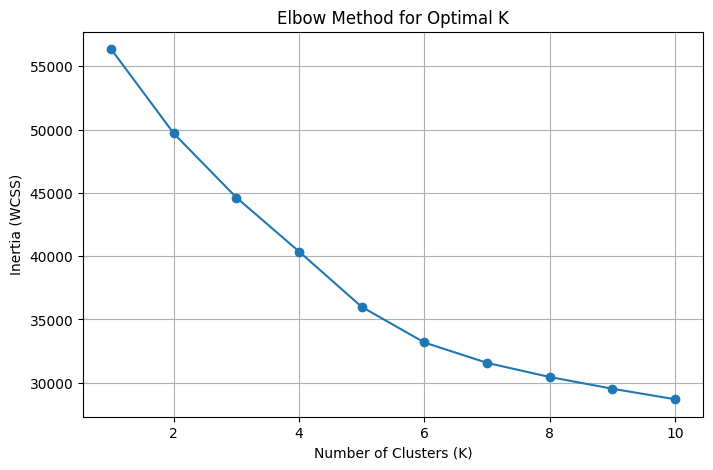

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We'll use training data for clustering
inertia = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()

## 6. K-Means Model Training

Using the selected value of K, a K-Means model is trained on the scaled dataset to generate customer segments.

In [ ]:
from sklearn.cluster import KMeans

# Train final model
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit model
kmeans.fit(X_train_scaled)

# Cluster labels
clusters = kmeans.labels_

print("Number of clusters created:", len(set(clusters)))

Number of clusters created: 5


In [ ]:
# Add cluster column to training data
X_train_clustered = X_train.copy()
X_train_clustered["Cluster"] = clusters

display(X_train_clustered.head())

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year,Cluster
3757,0,1,60,1,1,1,0,0,0,1,3
3165,0,30,55,0,0,1,0,0,1,0,1
4912,1,46,100,0,0,1,1,1,0,0,4
3877,0,43,66,1,0,1,0,0,1,0,1
3818,0,1,20,1,0,1,1,1,0,1,3


## 7. Cluster Visualization using PCA

Principal Component Analysis (PCA) is applied to reduce dimensionality and visualize customer clusters in two-dimensional space.

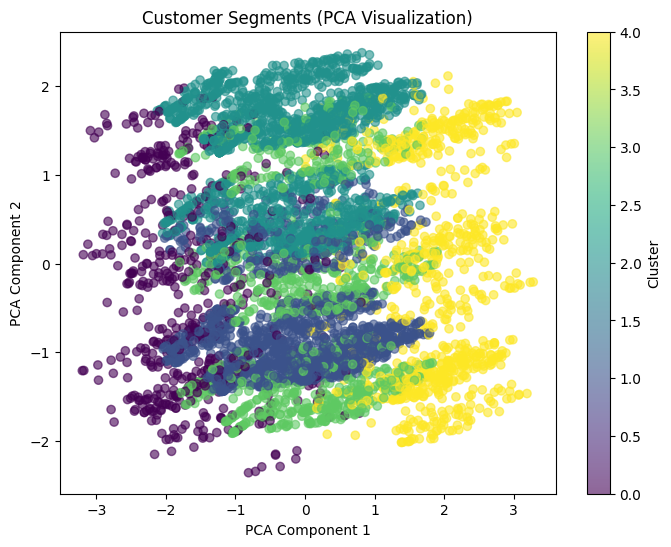

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Customer Segments (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Add cluster labels back to training data
X_train_clustered = X_train.copy()
X_train_clustered["Cluster"] = clusters

# Add churn column for interpretation
X_train_clustered["Churn"] = y_train.values

print(X_train_clustered.head())

      SeniorCitizen  tenure  MonthlyCharges  gender_Male  Dependents_Yes  \
3757              0       1              60            1               1   
3165              0      30              55            0               0   
4912              1      46             100            0               0   
3877              0      43              66            1               0   
3818              0       1              20            1               0   

      PhoneService_Yes  MultipleLines_Yes  InternetService_Fiber optic  \
3757                 1                  0                            0   
3165                 1                  0                            0   
4912                 1                  1                            1   
3877                 1                  0                            0   
3818                 1                  1                            1   

      Contract_One year  Contract_Two year  Cluster  Churn  
3757                  0              

In [ ]:
cluster_summary = X_train_clustered.groupby("Cluster").mean()
display(cluster_summary)

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year,Churn
Cluster,,,,,,,,,,,
0,0.151625,32.435018,42.119134,0.516245,0.285199,0.0,0.384477,0.440433,0.223827,0.250903,0.247292
1,0.000000,31.076445,63.241765,0.490367,0.328154,1.0,0.197017,0.000000,0.336855,0.000000,0.249223
2,0.000000,32.963682,63.563557,0.519724,0.360050,1.0,0.586099,1.000000,0.199123,0.000000,0.229806
3,0.000000,31.969082,64.486957,0.524638,0.339130,1.0,0.517874,0.258937,0.000000,1.000000,0.234783
4,1.000000,34.107271,83.725864,0.501788,0.078665,1.0,0.420739,0.412396,0.227652,0.227652,0.413588


In [ ]:
churn_by_cluster = X_train_clustered.groupby("Cluster")["Churn"].mean().sort_values(ascending=False)
print(churn_by_cluster)

Cluster
4    0.413588
1    0.249223
0    0.247292
3    0.234783
2    0.229806
Name: Churn, dtype: float64


In [ ]:
X_train_clustered.to_csv("clustered_customers.csv", index=False)

In [ ]:
cluster_summary.to_csv("cluster_summary.csv")

In [ ]:
plt.savefig("customer_segments_pca.png", dpi=300)
plt.savefig("elbow_method.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [ ]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

## 8. Cluster Analysis and Interpretation

Cluster labels are analysed to understand customer behavior patterns and identify differences between segments.

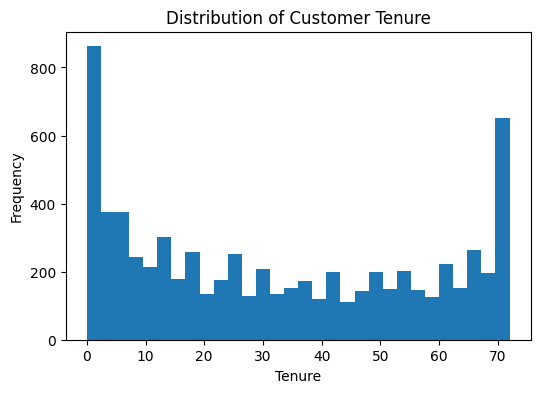

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["tenure"], bins=30)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

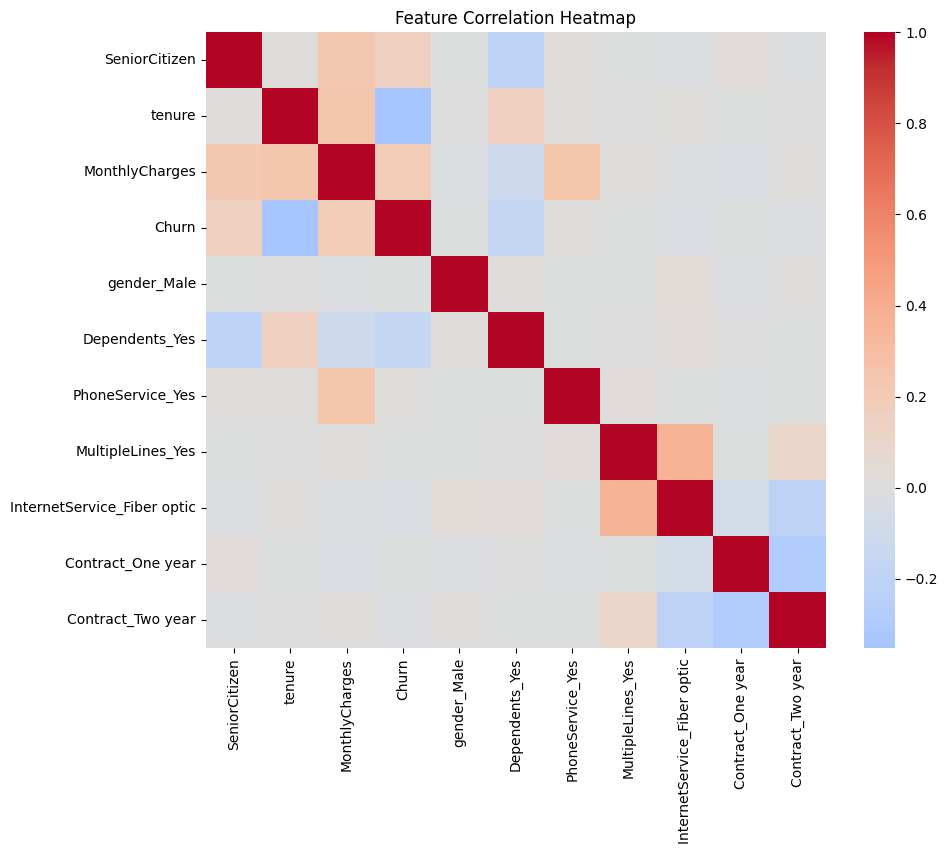

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

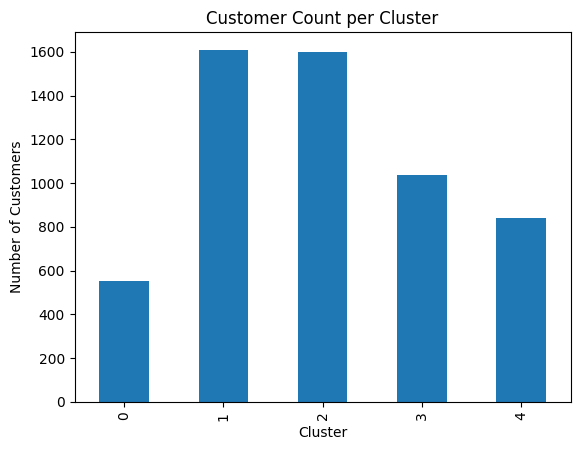

In [ ]:
cluster_counts = X_train_clustered["Cluster"].value_counts().sort_index()

cluster_counts.plot(kind="bar")
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

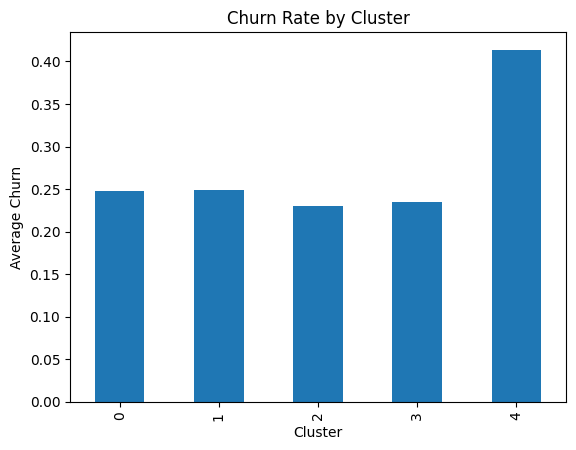

In [ ]:
churn_cluster = X_train_clustered.groupby("Cluster")["Churn"].mean()

churn_cluster.plot(kind="bar")
plt.title("Churn Rate by Cluster")
plt.ylabel("Average Churn")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_train_scaled, clusters)
print("Silhouette Score:", round(score, 4))

Silhouette Score: 0.1749


## Conclusion

The dataset was successfully prepared and segmented into customer clusters. These results provide a strong foundation for Stage 3 predictive modeling and churn prediction.